In [200]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ["figure.figsize"] = 10,6
import seaborn as sns
from scipy import stats
import math
import datetime
import urllib
import zipfile
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
import glob
ohe = OneHotEncoder
le = LabelEncoder()
from sklearn.compose import ColumnTransformer
le = LabelEncoder()

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import cohen_kappa_score

In [201]:
bike_station = pd.read_csv('2011-capitalbikeshare-tripdata.csv')


In [202]:
bike_station.tail(10)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
1226757,484,2011-12-31 23:36:51,2011-12-31 23:44:55,31113,Columbia Rd & Belmont St NW,31202,14th & R St NW,W00847,Member
1226758,620,2011-12-31 23:38:36,2011-12-31 23:48:56,31103,16th & Harvard St NW,31111,10th & U St NW,W00431,Member
1226759,410,2011-12-31 23:40:33,2011-12-31 23:47:23,31203,14th & Rhode Island Ave NW,31214,17th & Corcoran St NW,W00408,Member
1226760,356,2011-12-31 23:40:39,2011-12-31 23:46:36,31101,14th & V St NW,31203,14th & Rhode Island Ave NW,W00833,Member
1226761,349,2011-12-31 23:40:51,2011-12-31 23:46:40,31101,14th & V St NW,31203,14th & Rhode Island Ave NW,W00229,Member
1226762,300,2011-12-31 23:41:19,2011-12-31 23:46:20,31201,15th & P St NW,31214,17th & Corcoran St NW,W01459,Member
1226763,387,2011-12-31 23:46:43,2011-12-31 23:53:10,31223,Convention Center / 7th & M St NW,31201,15th & P St NW,W01262,Member
1226764,261,2011-12-31 23:47:27,2011-12-31 23:51:49,31107,Lamont & Mt Pleasant NW,31602,Park Rd & Holmead Pl NW,W00998,Member
1226765,2060,2011-12-31 23:55:12,2012-01-01 00:29:33,31205,21st & I St NW,31222,New York Ave & 15th St NW,W00042,Member
1226766,468,2011-12-31 23:55:56,2012-01-01 00:03:45,31221,18th & M St NW,31111,10th & U St NW,W01319,Member


In [203]:
bike_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Duration              1226767 non-null  int64 
 1   Start date            1226767 non-null  object
 2   End date              1226767 non-null  object
 3   Start station number  1226767 non-null  int64 
 4   Start station         1226767 non-null  object
 5   End station number    1226767 non-null  int64 
 6   End station           1226767 non-null  object
 7   Bike number           1226767 non-null  object
 8   Member type           1226767 non-null  object
dtypes: int64(3), object(6)
memory usage: 84.2+ MB


In [204]:
# Convert start date to datetime format
bike_station["Start date"] = bike_station["Start date"].astype("datetime64")


In [205]:
# Check to see if the type conversion worked.
bike_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226767 entries, 0 to 1226766
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Duration              1226767 non-null  int64         
 1   Start date            1226767 non-null  datetime64[ns]
 2   End date              1226767 non-null  object        
 3   Start station number  1226767 non-null  int64         
 4   Start station         1226767 non-null  object        
 5   End station number    1226767 non-null  int64         
 6   End station           1226767 non-null  object        
 7   Bike number           1226767 non-null  object        
 8   Member type           1226767 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 84.2+ MB


In [206]:
# Check how many types of users there are. There should only be 2 types, registered and casual

print("This is one of the unique values in the column: " + bike_station['Member type'].unique()) # lists the names of the unique values
print("There are this many unique values in the column:", bike_station['Member type'].nunique()) # lists the number of unique values
print(bike_station['Member type'].value_counts())



# There are 4 rows where the member type is unknown. I would drop these values.  

['This is one of the unique values in the column: Member'
 'This is one of the unique values in the column: Casual'
 'This is one of the unique values in the column: Unknown']
There are this many unique values in the column: 3
Member     979814
Casual     246949
Unknown         4
Name: Member type, dtype: int64


In [207]:
# Drop unknown values. And check if the code did what it should do.
bike_station = bike_station[bike_station["Member type"] != "Unknown"]


print("This is one of the unique values in the column: " + bike_station['Member type'].unique()) # lists the names of the unique values
print("There are this many unique values in the column:", bike_station['Member type'].nunique())

['This is one of the unique values in the column: Member'
 'This is one of the unique values in the column: Casual']
There are this many unique values in the column: 2


**In the dataset each row is a ride taken by a registered or casual. What we need to do is to calculate how many rides there are per hour. 
The way to do this is to groupby hourly for each member type and save that to a dataframe and later join them back again to a completely new dataframe that
shows the total rides per hour, regardless of the member type.**

In [208]:
# Here I am creating a new dataframe after first selecting all the rows with the "Casual" and then grouping them by Hour and then counting it using .count()
# renaming the column to "Casual"
casual = bike_station[bike_station['Member type'] == 'Casual'].groupby(pd.Grouper(key = 'Start date', freq = 'H')).count().rename(columns={'Member type': 'Casual'}).reset_index()
casual = casual[['Start date', "Casual"]]
casual.head()

,Start date,Casual
0,2011-01-01 00:00:00,3
1,2011-01-01 01:00:00,8
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,3
4,2011-01-01 04:00:00,0


In [209]:
# Here I am doing the same as above but for registered users. 
registered = bike_station[bike_station['Member type'] == 'Member'].groupby(pd.Grouper(key = 'Start date', freq = 'H')).count().rename(columns={'Member type': 'Registered'}).reset_index()
registered = registered[['Start date', "Registered"]]
registered.head()

,Start date,Registered
0,2011-01-01 00:00:00,13
1,2011-01-01 01:00:00,30
2,2011-01-01 02:00:00,26
3,2011-01-01 03:00:00,9
4,2011-01-01 04:00:00,1


In [210]:
# Now that we have our two dataframes, Registered and Casual, we need to join them into one df using merge.
df_user_count= pd.merge(registered,casual, how='outer', on = "Start date")
df_user_count.head()

,Start date,Registered,Casual
0,2011-01-01 00:00:00,13,3
1,2011-01-01 01:00:00,30,8
2,2011-01-01 02:00:00,26,5
3,2011-01-01 03:00:00,9,3
4,2011-01-01 04:00:00,1,0


In [211]:
# Now we create a total by adding the casual and registered user for each hour.
df_user_count = df_user_count.assign(Total = df_user_count['Registered'] + df_user_count['Casual'])
df_user_count.head()

,Start date,Registered,Casual,Total
0,2011-01-01 00:00:00,13,3,16
1,2011-01-01 01:00:00,30,8,38
2,2011-01-01 02:00:00,26,5,31
3,2011-01-01 03:00:00,9,3,12
4,2011-01-01 04:00:00,1,0,1


In [163]:
# # Now that we have our two dataframes, Registered and Casual, we need to join them into one df using merge.
# df_user_count= pd.merge(registered,casual, how='outer', on = "Start date")

# # But when we merge these two dataframes, Registered and Casual, we are merging them on the start date. 
# # So for instance at 1 am on 2011-01-01 there are 8 casual and 30 registered users.
# # But at 4 am on 2011-01-01 there is 0 
# df_user_count['Registered'] = df_user_count['Registered'].fillna(0)
# df_user_count['Casual'] = df_user_count['Casual'].fillna(0).astype(int)
# df_user_count = df_user_count.assign(Total = df_user_count['Registered'] + df_user_count['Casual'])

In [223]:
# Here I want to break up the start date to granular components that I may use for the machine learning model.

df_user_count['Year'] = df_user_count['Start date'].dt.year
df_user_count['Quarter'] = df_user_count['Start date'].dt.quarter
df_user_count['Month'] = df_user_count['Start date'].dt.month
df_user_count['Date'] = df_user_count['Start date'].dt.day
df_user_count['Day_of_Week'] = df_user_count['Start date'].dt.dayofweek
df_user_count['Hour'] = df_user_count['Start date'].dt.hour
df_user_count["Weekend"] = df_user_count['Day_of_Week'] > 4

In [224]:
# The weekend is boolean and shows as true or false. So that needs to be converted to integer
df_user_count.head()

,Start date,Registered,Casual,Total,Year,Quarter,Month,Date,Day_of_Week,Hour,Weekend
0,2011-01-01 00:00:00,13,3,16,2011,1,1,1,5,0,True
1,2011-01-01 01:00:00,30,8,38,2011,1,1,1,5,1,True
2,2011-01-01 02:00:00,26,5,31,2011,1,1,1,5,2,True
3,2011-01-01 03:00:00,9,3,12,2011,1,1,1,5,3,True
4,2011-01-01 04:00:00,1,0,1,2011,1,1,1,5,4,True


In [166]:
# Converting Weekend from True or False to 1 or 0

df_user_count["Weekend"] = df_user_count["Weekend"].astype(int)

In [167]:
# Now we can safely drop the Start Date column since we've extracted everything we can regarding time. 
df_user_count = df_user_count[["Registered", "Casual", "Total", "Year", "Quarter", "Month", "Date", "Day_of_Week", "Hour", "Weekend"]]


In [226]:
df_user_count["Day_of_Week"]==6

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Name: Day_of_Week, Length: 8760, dtype: bool

# Now we can start with the Machine Learning model.

## Import Libraries

In [169]:
# import whatever libraries you have to here.
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Split the dataset to Test and Train

In [170]:
# split the data here
X = df_user_count[["Year", "Quarter", "Month", "Date", "Day_of_Week", "Hour", "Weekend"]]
y = df_user_count[["Total"]]

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (8760, 7)
Shape of y: (8760, 1)


In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [172]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (7008, 7)
X_test: (1752, 7)
Y_train: (7008, 1)
Y_test: (1752, 1)


## Train the Linear Regression Model

In [173]:
# train the linear regression model here.
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## Predict the Test Results

In [174]:
# predict the results here
y_pred = linreg.predict(X_test)
y_pred

array([[ 67.67349085],
       [ 96.92916662],
       [145.8623669 ],
       ...,
       [ 37.83712645],
       [258.10552672],
       [ 85.92513059]])

## Evaluate the Model

In [175]:
# evaluate the model here.
Accuracy = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 19.72


## Plot the results

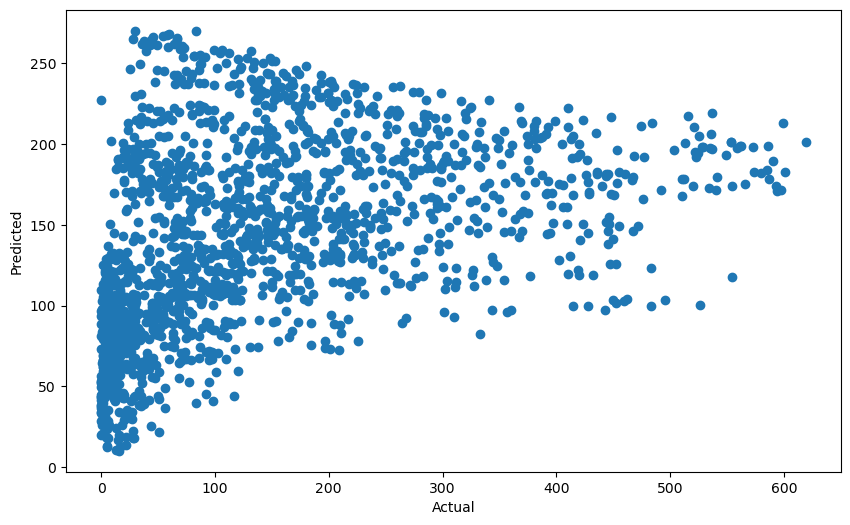

In [176]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

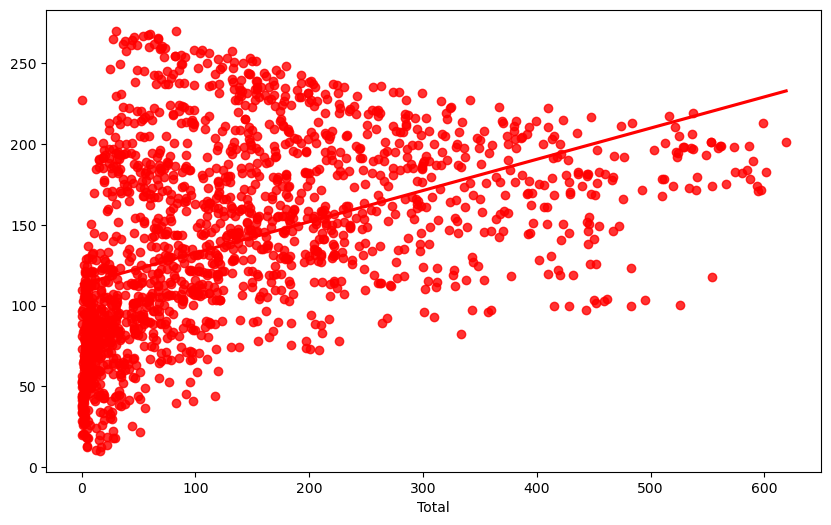

In [177]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [178]:
# What is the Intercept and the coefficients
print('Intercept: \n', linreg.intercept_)
print('Coefficients: \n', linreg.coef_)

Intercept: 
 [-1.49633397]
Coefficients: 
 [[ 0.         10.43833413  4.03882623 -0.01669474 -0.65998525  7.82638164
   4.8581658 ]]


In [179]:
display(X_train.head())

,Year,Quarter,Month,Date,Day_of_Week,Hour,Weekend
2031,2011,1,3,26,5,15,1
6570,2011,4,10,1,5,18,1
6371,2011,3,9,23,4,11,0
3490,2011,2,5,26,3,10,0
7700,2011,4,11,17,3,20,0


In [180]:
import statsmodels.api as sm
# with statsmodels
x = sm.add_constant(X_train) # adding a constant
x.head()

,Year,Quarter,Month,Date,Day_of_Week,Hour,Weekend
2031,2011,1,3,26,5,15,1
6570,2011,4,10,1,5,18,1
6371,2011,3,9,23,4,11,0
3490,2011,2,5,26,3,10,0
7700,2011,4,11,17,3,20,0


In [181]:

model_lin = sm.OLS(y_train, x).fit()
predictions = model_lin.predict(x) 
 
print_model = model_lin.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     307.6
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:44:45   Log-Likelihood:                -43316.
No. Observations:                7008   AIC:                         8.665e+04
Df Residuals:                    7001   BIC:                         8.669e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Year           -0.0007      0.003     -0.264      